In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

In [16]:
N,D,H=64,1000,100
x=tf.placeholder(tf.float32,shape=(N,D))
y=tf.placeholder(tf.float32,shape=(N,D))
w1=tf.Variable(tf.random_normal((D,H)))
w2=tf.Variable(tf.random_normal((H,D)))
h=tf.maximum(tf.matmul(x,w1),0)
y_pred=tf.matmul(h,w2)
diff=y_pred-y
loss=tf.reduce_mean(tf.reduce_sum(diff**2, axis=1))
grad_w1,grad_w2=tf.gradients(loss,[w1,w2])
learning_rate=1e-3
first_momentw1=0
first_momentw2=0
second_momentw1=0
second_momentw2=0
beta1 = 0.9
beta2 = 0.999
first_momentw1=beta1*first_momentw1+(1-beta1)*grad_w1
second_momentw1=beta2*second_momentw1+(1-beta2)*grad_w1*grad_w1
first_momentw2=beta1*first_momentw2+(1-beta1)*grad_w2
secomd_momentw2=beta2*second_momentw2+(1-beta2)*grad_w2*grad_w2
x_w1 = w1 - learning_rate * grad_w1 / (tf.sqrt(second_momentw1) + 1e-7)
x_w2 = w2 - learning_rate * grad_w2 / (tf.sqrt(secomd_momentw2) + 1e-7)
new_w1 = w1.assign(x_w1)
new_w2 = w2.assign(x_w2)
updates = tf.group(new_w1,new_w2)


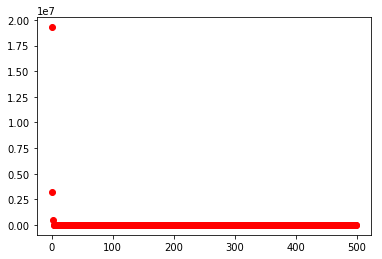

3223480.0 333.44617


In [36]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    values={x: np.random.rand(N,D),y: np.random.rand(N,D)}
    step=500
    loss_summary=[]
    for i in range (step):
        out, _= sess.run([loss, updates], feed_dict=values)
        loss_val = out
        loss_summary.append(out)
    plt.plot(range(step), loss_summary, 'ro', label='loss_val')
    plt.show()
    print(loss_summary[1],loss_summary[step-1])
    

In [31]:
print(grad_w1)

Tensor("gradients_3/MatMul_10_grad/MatMul_1:0", shape=(1000, 100), dtype=float32)
